<a href="https://colab.research.google.com/github/SantiagoIM/THPII/blob/master/Taller2P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong><h1>UNIVERSIDAD NACIONAL DE COLOMBIA

<h2>FACULTAD DE INGENIERÍA<h2>

<h2>DEPARTAMENTO DE INGENIERÍA DE SISTEMAS E INDUSTRIAL<h2>

<h2>Taller de Herraminetas y Problemas en Ingeniería Industrial</h2>

<strong><h2>Taller 2. Modelado matemático</h2></strong>

<h3>Laura Julieth Gavidia Malaver</h3>

<h3>Santiago Irreño Mejía</h3>


---





El contenido de este notebook de python corresponde al desarrollo del segundo punto del Taller II.

Dados los datos dados en el archivo insurance.csv realizar las siguientes actividades:

## **1. Gráficos de dispersión.**


>  Realizar un gráfico de dispersión de la variable charges versus cada una de las variable cuantitativas y respoder, ¿Es posible observar una relación entre los valores de las variables cuantitativas y la variable charges?.



In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os 
os.chdir ("/content/gdrive/My Drive/THPII/DataFiles")

In [ ]:
!ls

datos1.txt	      Resultados_Saber_Pro_Competencias_Especificas_2018-2.csv
datos.csv	      Resultados_Saber_Pro_Competencias_Genericas_2018-2.csv
insurance.csv	      SIVICAP_2016V2.xlsx
Poblacion2018V2.xlsx


In [ ]:
datos=pd.read_csv('insurance.csv')
datos

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Debido a que en los datos obtenidos hay valores atipicos, consideramos fundamental obtener la línea de tendencia para la realización de los gráficos de dispersión. De este modo, es más sencillo observar la relación entre las variables cuantitativas y la variable charges.

### **Age vs. Charges**




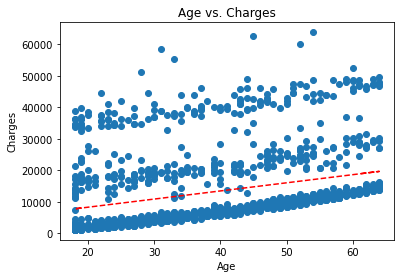

In [ ]:
x= datos["age"]
y= datos["charges"]
plt.scatter(x, y)
plt.title("Age vs. Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

Se determina que hay una relación positiva, ya que los valores observados de ambas variables (age, charges) aumentan. 
Aunque algunos puntos no siguen el patrón exacto, la tendencia global es clara, desde la izquierda inferior a la derecha superior del gráfico. Entre más años tenga una persona, el costo del seguro médico aumenta.

### **Bmi vs. Charges**

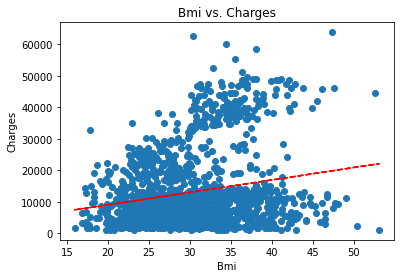

In [ ]:
x= datos["bmi"]
y= datos["charges"]
plt.scatter(x, y)
plt.title("Bmi vs. Charges")
plt.xlabel("Bmi")
plt.ylabel("Charges")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

Al igual que el gráfico anterior este presenta una relación positiva. Sin embargo, al observar la pendiente de la línea de tendencia, es evidente que para este caso la relación entre la variable cuantitativa (bmi) y "charges" es mayor. Entre el índice de masa corporal de una persona sea más alto, el costo  del seguro médico aumentará de precio. 

### **Children vs. Charges**

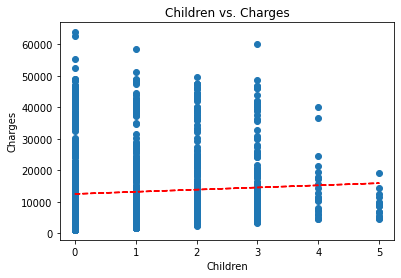

In [ ]:
x= datos["children"]
y= datos["charges"]
plt.scatter(x, y)
plt.title("Children vs. Charges")
plt.xlabel("Children")
plt.ylabel("Charges")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

Según la línea de tendencia de este gráfico, no hay relación entre "children" y "charges". A pesar de ello, si se determina la relación despreciando la línea de tendencia, se concluye que a partir del cuarto hijo, el costo del seguro médico disminuye.

## **2. Diagramas box-plot.**


> Realizar gráficos box-plot de la variable charges acorde con las categorías de las variables categóricas y respoder: 
*   ¿Es posible observar un comportamiento diferente de la variable charges para las diferentes categorías de cada una de las variables categóricas?.
*   ¿En cuál de estas variables es más evidente?.


### **Sex vs. Charges**

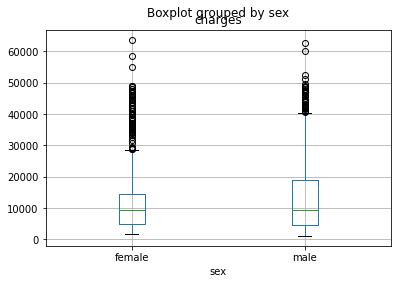

In [ ]:
datos.boxplot(column='charges',by='sex')

El comportamiento de las categorias de "sex" son totalmente distintos, ya que:
* A pesar de que ambas categorías presentan gran cantidad de datos atípicos, se puede observar que la categoría *female* tiene más. 
* A su vez, se logra determinar que el límite superior de la categoría *male* es mayor. 
* Se aprecia que el sesgo de *male* es positivo, mientras que para *female* la mediana se sitúa en el centro de la caja  entonces la distribución es simétrica y tanto la media, mediana y moda coinciden.


### **Smoker vs. Charges**

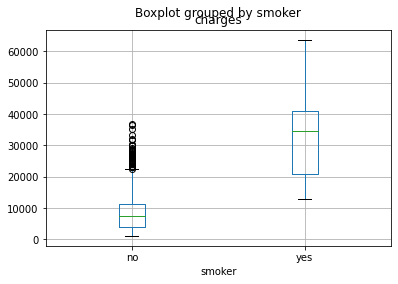

In [ ]:
datos.boxplot(column='charges',by='smoker')

Igualmente que en el diagrama anterior, las categorías de "smoker" son muy diferentes en su comportamiento, puesto que:
* Tanto el límite inferior y superior de la categoría *yes* es mayor.
*  Se aprecia que el sesgo de *yes* es negativo, mientras que para *no* la distribución es simétrica.
* La categoría *no* contiene gran cantidad de valores atípicos.


### **Region vs. Charges**

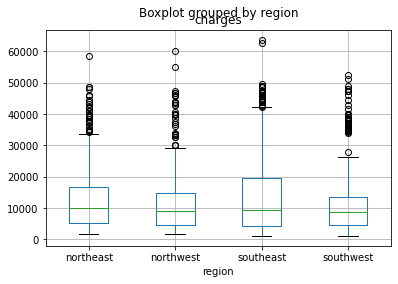

In [ ]:
datos.boxplot(column='charges',by='region')

En el caso de la variable categórica "region", la categoria *southeast* presenta un comportamiento diferente, en razón de que: 
* Las dimensiones de la caja de *southeast* que están determinadas por la distancia del rango intercuartílico, son considerablemente mayores que las demás categorías. 
* Es la única categoría que  su distribución no es simétrica, en cambio, esta posee sesgo positivo. 


## **3. Modelo lineal.**


> Compare un modelo lineal que relacione la variable charges (como variable de respuestas) con las variables age,  bmi, children, smoke con otro que relacione la variable charges  con las variables age,  bmi, children, smoke y región. 



### **Tratamiento de los datos**

Para la elaboración de los modelos lineales, primero reemplazamos los valores de las variables categóricas (region y smoker) por valores enteros. Para esto se emplea la función *replace* de la librería *pandas*. 

In [ ]:
datos['smoker']=datos['smoker'].replace('yes','0')
datos['smoker']=datos['smoker'].replace('no','1')

Reemplazo realizado para la variable smoker:


*   Elemento "yes" por el valor 0.
*   Elemento "no" por el valor 1.



In [ ]:
datos['region']=datos['region'].replace('southwest','0')
datos['region']=datos['region'].replace('southeast','1')
datos['region']=datos['region'].replace('northwest','2')
datos['region']=datos['region'].replace('northeast','3')

Reemplazo realizado para la variable region:
*   Elemento "southwest" por 0.
*   Elemento "southeast" por 1.
*   Elemento "northwest" por 2.
*   Elemento "northeast" por 3.
 








Aunque parezaca que las variables categoricas smoker y region ahora son variables cuantitativas, esto no es cierto, ya que sus valores en el data frame original son de tipo *object*. Por consiguiente, creamos variables auxiliares para hacer la conversión del tipo de datos, primero de *object* a *string*, y después de *string* a *int*. Finalmente las variables auxiliares, se añaden al data frame.

In [ ]:
smoker_aux=datos['smoker'].astype(str).astype(int)
datos["smoker_aux"]=smoker_aux

In [ ]:
region_aux=datos['region'].astype(str).astype(int)
datos["region_aux"]=region_aux

In [ ]:
datos

,age,sex,bmi,children,smoker,region,charges,smoker_aux,region_aux
0,19,female,27.900,0,0,0,16884.92400,0,0
1,18,male,33.770,1,1,1,1725.55230,1,1
2,28,male,33.000,3,1,1,4449.46200,1,1
3,33,male,22.705,0,1,2,21984.47061,1,2
4,32,male,28.880,0,1,2,3866.85520,1,2
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,1,2,10600.54830,1,2
1334,18,female,31.920,0,1,3,2205.98080,1,3
1335,18,female,36.850,0,1,1,1629.83350,1,1
1336,21,female,25.800,0,1,0,2007.94500,1,0


In [ ]:
datos.dtypes

age             int64
sex            object
bmi           float64
children        int64
smoker         object
region         object
charges       float64
smoker_aux      int64
region_aux      int64
dtype: object

**Para el desarrollo de ambos modelos matemáticos, se implementa el algoritmo de Regresión Lineal Múltiple. Los modelos van a predecir el costo de un seguro médico, según los valores observados en las variables.**

La ecuación a utilizar para este modelo es:$$Y = m_1 X_1 + m_2 X_2 + … + m_n X_n+b$$

### **Primer modelo lineal**


>De acuerdo a la edad, el indice de masa corporal, la cantidad de hijos y si la persona es o no fumadora.


In [ ]:
from sklearn import datasets, linear_model

Se le asigna a "X_multiple" las columnas de las variables mencionadas, y a "y" la variable de respuesta *charges*.

In [ ]:
X_multiple = datos[0:1338][['age','bmi','children','smoker_aux']]

In [ ]:
y = datos.charges

Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos, de los cuales se toma un 20% de estos.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2)

In [ ]:
lr_multiple = linear_model.LinearRegression() #definición del algoritmo a utilizar

Definido el algoritmo se procede a entrenar el modelo con los datos correspondiente, para ello utilizamos la instrucción fit.

In [ ]:
lr_multiple.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Y finalmente se realiza la predicción utilizando los datos de prueba.

In [ ]:
Y_pred_multiple = lr_multiple.predict(X_test)

In [ ]:
pendientes1=lr_multiple.coef_
interseccion1=lr_multiple.intercept_

In [ ]:
presicion1=lr_multiple.score(X_train, y_train)

### **Segundo modelo lineal**


>De acuerdo a la edad, el indice de masa corporal, la cantidad de hijos, si la persona es o no fumadora y la región donde vive.


Se le asigna a "X_multiple" las columnas de las variables mencionadas, y a "y" la variable de respuesta *charges*.

In [ ]:
X_multiple = datos[0:1338][['age','bmi','children','smoker_aux','region_aux']]

In [ ]:
y = datos.charges

Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos, de los cuales se toma un 20% de estos.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2)

In [ ]:
lr2_multiple = linear_model.LinearRegression() #definición del algoritmo a utilizar

Definido el algoritmo se procede a entrenar el modelo con los datos correspondiente, para ello utilizamos la instrucción fit.

In [ ]:
lr2_multiple.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Y finalmente se realiza la predicción utilizando los datos de prueba.

In [ ]:
Y_pred_multiple = lr2_multiple.predict(X_test)

In [ ]:
pendientes2=lr2_multiple.coef_
interseccion2=lr2_multiple.intercept_

In [ ]:
presicion2=lr2_multiple.score(X_train, y_train)

### **Comparación de los modelos**

Pendientes (m):

In [ ]:
print('Modelo 1: \n', pendientes1)

Modelo 1: 
 [   260.9528634     330.65116235    497.87836163 -23712.04757603]


In [ ]:
print('Modelo 2: \n', pendientes2)

Modelo 2: 
 [   253.85803924    338.9859027     481.13430639 -24420.64484582
    400.82018949]


Intersecciones (b):

In [ ]:
print('Modelo 1: \n', interseccion1)

Modelo 1: 
 11167.713136678452


In [ ]:
print('Modelo 2: \n', interseccion2)

Modelo 2: 
 11277.938356005352


Precisiones:

In [ ]:
print('Modelo 1: \n', presicion1)

Modelo 1: 
 0.7513353249719271


In [ ]:
print('Modelo 2: \n', presicion2)

Modelo 2: 
 0.7636556297569999


**Conclusiones**

Entre más variables de entrada tenga un modelo matemático, en el que se haya implementado el algoritmo de Regresión Lineal Múltiple, la precisión de este mejorará. Ya que como se muestra en la comparación de los modelos realizados, la precisión del modelo que cuenta con una variable de más (segundo) aumento. Teniendo en cuenta que mientras el valor sea más cercano a 1 mejor será el modelo.
 
Sin embargo, también es posible que no exista ninguna relación entre las variables de entrada y el costo del seguro médico, con lo cual nunca podremos predecir con certeza esta salida. 
